In [1]:
import growth_simulations as g
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload 

In [3]:
%autoreload 2

In [4]:
def pcc_model(beta, sigma_t, gr, delta):
    # note that the growth function agrees to first order with that in the main text under the substitution delta=alpha
    temp_r=beta/(1-beta)
    num=delta/(2-delta)*((1-delta)*(np.log(temp_r)/(2*gr))**2-sigma_t**2)
    sigma_tdn=np.sqrt(2*sigma_t**2/(2-delta)+delta/(2-delta)*(np.log(temp_r)/(2*gr))**2)
    sigma_tdn1=np.sqrt((2*sigma_t**2+delta*(1-delta)**2*(np.log(temp_r)/(2*gr))**2)/(2-delta))
    denom=sigma_tdn*sigma_tdn1
    return num/denom

def pcc_model_siblings(beta, sigma_t, gr, delta):
    # note that the growth function agrees to first order with that in the main text under the substitution delta=alpha
    temp_r=beta/(1-beta)
    num=(2-delta)*sigma_t**2
    denom=2*sigma_t**2+delta*(1-delta)**2*(np.log(temp_r)/(2*gr))**2
    return 1-num/denom

In [36]:
# Setting simulation parameters
l = np.array([1.0])
td_std = np.linspace(0.0, 0.2, 11)  # 1
lambda_std = np.linspace(0.0, 0.3, num=13)  # 5
delta = np.array([1.0])
beta = np.linspace(0.05, 0.5, num=10)  # 9
r = beta/(1-beta)
alpha = np.linspace(0.0, 1.0, num=11)  # 5
num_rep = 40  # number of repeats

par_vals = {'nstep': 1000, 'dt': 0.001, 'v_init': 1.0, 'modeltype': 7, 'delta': delta[0], 'lambda': l[0]}
par_vals['td_std'] = td_std[5]
par_vals['lambda_std']=lambda_std[0]
par_vals['r']=r[5]
par_vals['alpha']=alpha[2]

In [37]:
init_pop = g.starting_popn(par_vals)
par_vals['nstep']=5000
c, obs, [temp_vols,temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
init_pop = g.starting_popn_seeded(c, par_vals)
par_vals['nstep']=9000
c, obs, [temp_vols,temp_vols_G1] = g.discr_time_1(par_vals, init_pop)

In [35]:
i6=0
xv = [obj.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.parent.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.pearsonr(xv, yv)
print temp[0]
print par_vals
print pcc_model(par_vals['r']/(1+par_vals['r']), par_vals['td_std'], 1.0, par_vals['alpha'])

0.43559789605100147
{'td_std': 0.1, 'lambda_std': 0.0, 'v_init': 1.0, 'modeltype': 7, 'r': 0.4285714285714286, 'delta': 1.0, 'alpha': 0.2, 'dt': 0.005, 'nstep': 1800, 'lambda': 1.0}
0.545120042010448


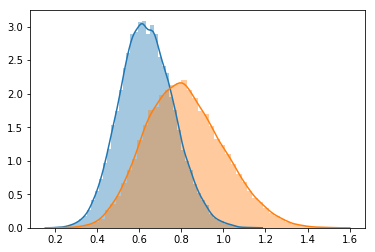

In [13]:
xv = [obj.t_grow for obj in c if obj.celltype==0 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.t_grow for obj in c if obj.celltype==1 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
sns.distplot(xv)
sns.distplot(yv)

Text(0.5,0,'Vb')

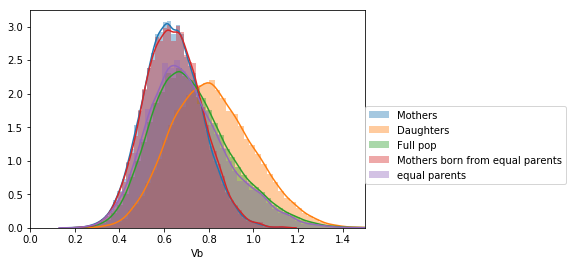

In [32]:
xv = [obj.t_grow for obj in c if obj.celltype==0 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.t_grow for obj in c if obj.celltype==1 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
fullpop=[obj.t_grow for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
sns.distplot(xv, label='Mothers')
sns.distplot(yv, label='Daughters')
sns.distplot(fullpop,label='Full pop')
sns.distplot(zv1, label='Mothers born from equal parents')
sns.distplot(zv2, label='equal parents')
plt.legend(loc=[1.0,0.2])
plt.xlim(xmin=0,xmax=1.5)
plt.xlabel('Vb')

In [17]:

print len(xv),len(yv)*1.0

35085 35085.0


In [19]:
i6=0
val=[obj.parent.celltype for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>0]
print np.sum(val)*1.0/len(val)

0.4587931697139406


In [18]:
i6=0
val=[obj.parent.celltype for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>0* par_vals['dt'] * np.log(2)/par_vals['lambda']]
print np.sum(val)*1.0/len(val)

0.45552230297848084


In [21]:
xv=[obj for obj in c if obj.celltype == 0 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.celltype==0]
yv=[obj for obj in c if obj.celltype == 0 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.celltype==1]
random_inds1 = np.random.randint(0,len(xv),10**4)
random_inds2 = np.random.randint(0,len(yv),10**4)
zv = [xv[ind] for ind in random_inds1]+[yv[ind] for ind in random_inds2]
zv1=[obj.t_grow for obj in zv]
zv2=[obj.parent.t_grow for obj in zv]
temp = scipy.stats.pearsonr(zv1, zv2)
print temp

(0.43502004854175835, 0.0)


In [22]:
val=[obj.parent.celltype for obj in zv]
print np.sum(val)*1.0/len(val)

0.5


In [8]:
np.sum(xv<0)

0

In [15]:
i6=0
xv = [obj.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.parent.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.pearsonr(xv, yv)
print temp[0]
print par_vals
print pcc_model(par_vals['r']/(1+par_vals['r']), par_vals['td_std'], 1.0, par_vals['alpha'])

0.4247070803958025
{'td_std': 0.1, 'lambda_std': 0.0, 'v_init': 1.0, 'modeltype': 7, 'r': 0.4285714285714286, 'delta': 1.0, 'alpha': 0.2, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}
0.545120042010448


In [75]:
i6=1
xv = [obj.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.parent.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.pearsonr(xv, yv)
print temp[0]
print par_vals
print pcc_model(par_vals['r']/(1+par_vals['r']), par_vals['td_std'], 1.0, par_vals['alpha'])

0.5714863263470618
{'td_std': 0.1, 'lambda_std': 0.0, 'v_init': 1.0, 'modeltype': 7, 'r': 0.4285714285714286, 'delta': 1.0, 'alpha': 0.2, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}
0.545120042010448


In [70]:
i6=1
xv = [obj.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.parent.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.pearsonr(xv, yv)
print temp[0]
print par_vals
print pcc_model(par_vals['r']/(1+par_vals['r']), par_vals['td_std'], 1.0, par_vals['alpha'])

0.5499717353954372
{'td_std': 0.1, 'lambda_std': 0.0, 'v_init': 1.0, 'modeltype': 15, 'r': 0.4285714285714286, 'delta': 1.0, 'alpha': 0.2, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}
0.545120042010448


In [58]:
i6=1
xv = [obj.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.parent.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.pearsonr(xv, yv)
print temp[0]
print par_vals
print pcc_model(par_vals['r']/(1+par_vals['r']), par_vals['td_std'], 1.0, par_vals['alpha'])

0.9721911985877933
{'td_std': 0.02, 'lambda_std': 0.0, 'v_init': 1.0, 'modeltype': 15, 'r': 0.11111111111111112, 'delta': 1.0, 'alpha': 0.8, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}
0.9877521904120289


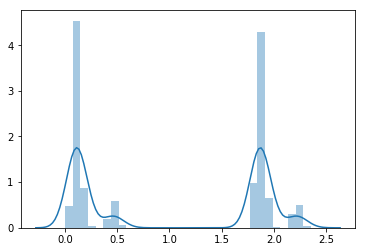

In [59]:
xv = [obj.t_grow for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
sns.distplot(xv)

In [51]:
i6=1
xv = [obj.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.parent.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.pearsonr(xv, yv)
print temp[0]
print par_vals
print pcc_model(par_vals['r']/(1+par_vals['r']), par_vals['td_std'], 1.0, par_vals['alpha'])

0.6112124817654567
{'td_std': 0.1, 'lambda_std': 0.0, 'v_init': 1.0, 'modeltype': 15, 'r': 0.11111111111111112, 'delta': 1.0, 'alpha': 0.8, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}
0.7701248862577301


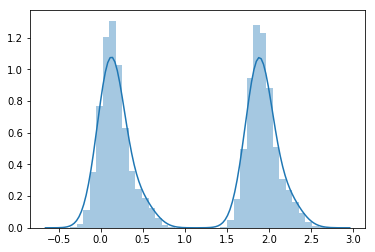

In [54]:
xv = [obj.t_grow for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
sns.distplot(xv)

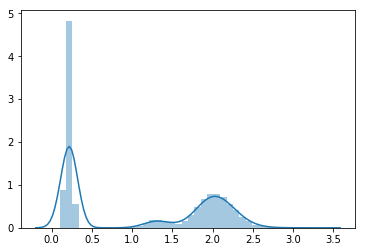

In [55]:
xv = [obj.vb for obj in c if obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
sns.distplot(xv)

In [42]:
i6=1
xv = [obj.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.parent.t_grow for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda'] and obj.parent.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.pearsonr(xv, yv)
print temp[0]
print par_vals
print pcc_model(par_vals['r']/(1+par_vals['r']), par_vals['td_std'], 1.0, par_vals['alpha'])

0.6501246880662965
{'td_std': 0.1, 'lambda_std': 0.0, 'v_init': 1.0, 'modeltype': 15, 'r': 0.11111111111111112, 'delta': 1.0, 'alpha': 0.8, 'dt': 0.01, 'nstep': 900, 'lambda': 1.0}


0.7701248862577301


In [44]:
xv = [obj.t_grow for obj in c if
      obj.celltype == 1 and obj.tb > 400 * par_vals['dt'] * np.log(2) / par_vals['lambda']]  # daughter progeny
yv = [obj.parent.nextgen.t_grow for obj in c if
      obj.celltype == 1 and obj.tb > 400 * par_vals['dt'] * np.log(2) / par_vals['lambda']]  # mother progeny
temp = scipy.stats.pearsonr(xv, yv)
print temp[0]
print pcc_model_siblings(par_vals['r']/(1+par_vals['r']), par_vals['td_std'], 1.0, par_vals['alpha'])

0.7068561017187653
0.7952999739503307


In [46]:
xv = [obj.vb for obj in c if obj.celltype == 1 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.vd for obj in c if obj.celltype == 1 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.linregress(xv, yv)

In [47]:
temp[0]

1.4824351098244941

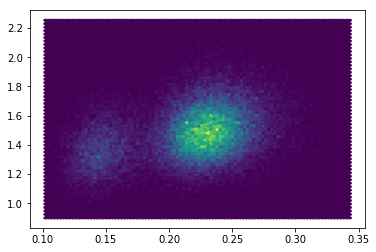

In [48]:
plt.hexbin(xv,yv)